In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import rasterio
from rasterio.plot import show
from rasterio.merge import merge
from rasterstats import gen_zonal_stats
from pprint import pprint
from tqdm import tqdm

In [2]:
PATH = "D:/code/elections/gis"

In [3]:
rasters_merged = {}
for year in range(2000, 2035, 5):
    rasters_merged[year] = rasterio.open(f"{PATH}/ghsl/odisha/merged/GHS_BUILT_S_E{year}_GLOBE_R2023A_4326_3ss_V1_0_merged.tif")

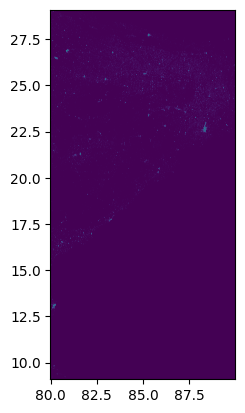

<AxesSubplot:>

In [4]:
show((rasters_merged[2000], 1))

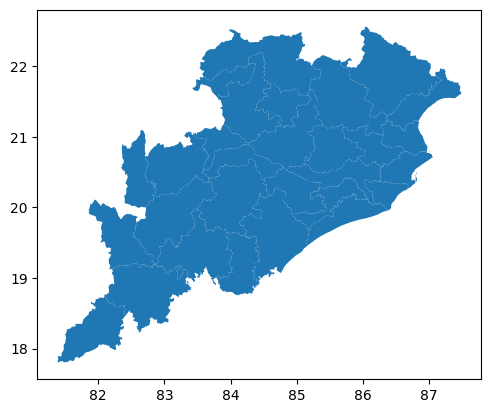

In [5]:
gdf = gpd.read_file(f"{PATH}/shp/district.shp")
gdf.plot()
plt.show()

In [6]:
populated_vectors = {}
for year in tqdm(range(2000, 2005, 5)):
    stats = gen_zonal_stats(gdf, rasters_merged[year], stats=['mean', 'median', 'min', 'max', 'std'])
    populated_vectors[year] = gdf.join(gpd.GeoDataFrame.from_features(stats))

100%|██████████| 1/1 [00:00<?, ?it/s]


In [ ]:
populated_vectors[2000].head()